# Random Variables and The Normal Distribution

#### Definition of a Random Variable

A random variable is a number that describes the outcome of an event. We can never be certain what value a random variable will take until after the event happens.

#### Examples of Random Variables

| Event                                                   | Random Variable                         |
|---------------------------------------------------------|-----------------------------------------|
| Flipping a coin                                         | 1 if heads, 0 if tails                  |
| Rolling a die                                           | What number will appear face up         |
| Completion of a thesis                                  | The number of years it takes            |
| Weight of a dead cat's heart                            | How much the heart weighs in grams      |
| Calculating the average weight of 144 dead cats' hearts | How much the average weight is in grams |

#### Probability Distribution Functions (PDFs)

Although we can never be certain what value random variable can take on, we often know or can guess what's called a <font color='red'>probability distribution function</font> or <font color='red'>PDF</font> for short. PDF's tell you what the probability is that a random variable will take on a certain value. In other words they tell you the probability of an event going down a certain way. If the event you're concerned with is the completion of a thesis and the random variable is number of years it takes, then the PDF could tell you that taking 4.5 years has a probability of 0.4, 5 years has a probability of 0.3, 10 years has a probability of 0.05, etc. Note that continuous random variables like the number of years it takes to complete a thesis  have PDFs, but discrete random variables like what number will face up when you roll a die have what's called <font color='red'>probability mass functions</font> or <font color='red'>PMFs</font>. This small detail is unimportant to know for this presentation, but is just a heads up for when you go out and read papers.

#### The PDF of the Normal Distribution

If X is a random variable, and its PDF is the following

$$p(\,x\,|\,\mu, \sigma)= \frac{1}{\sqrt{2\pi\sigma^2}}\mathrm{exp}\left\{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right\}$$

then we say X is <font color='red'>normally distributed</font> or X follows the normal distribution. This means we can get the probability that X will take on certain values since it is normally distributed. To find the probability that X will equal 3.23 we simply plug in 3.23 for x in the above equation. There are many other distributions, in fact infinite, but the normal distribution is a famous one because many random variables we encounter out in the wild seem normally distributed.

I mentioned that we can get the probability that X will equal 3.23 or any number for that matter, just from the above PDF, but we also need to know what $\mu$ and $\sigma$ above are to get that probability. $\mu$ and $\sigma$ are called the <font color='red'>parameters</font> of the normal distribution. The PDF depends on what values they take on. $\mu$ is called the <font color='red'>mean</font> of the normal distribution and $\sigma$ is called the <font color='red'>standard deviation</font> of the normal distribution. Below is the normal distribution plotted with several different parameters.

<img src="Normal_Distribution_PDF.svg">

#### Mean or Expected Value

Pretend that there are many, many alternate universes, and in each of these universes X takes on a different value. If we averaged the value that X took in all these universes the resulting number is called the <font color='red'>mean</font> or <font color='red'>expected value</font> of X. Every random variable has an expected value. Using the PDF you can calculate the expected value. For the normal distribution the expected value will always be $\mu$.

#### Modes of Random Variables

If we look at what value X took on the most times in all those alternate universes, the resulting value would be called the <font color='red'>mode</font> of the random variable X. Every random variable has a mode, and it is simply the maximum of the PDF. This makes sense because the mode is number that X will take on most often and thus with highest probability. For normal random variables, the mode happens to always be $\mu$.

#### Standard Deviation or Variance of Random Variables

Now say we have the expected value of a random variable. We can take the value X took on in all those alternate universes and find the squared distance from the mean. We do this by subtracting the mean from the value and squaring it. If we then took all these squared distances from the mean that X was in all these alternate universes and we average these squared distances then the result is called the <font color='red'>variance</font> of the random variable. The variance of a random variable tells you on average how far a random variable will fall from its mean. The square root of the variance is called the <font color='red'>standard deviation</font>. For the normal distribution the square root is $\sigma$.

# Histograms and Univariate Data Exploration

The data we get can often be modeled as multiple instances or realizations of a random variable. For example, we can have a dataset that simply lists the results of 100 tosses of a die. The result of each toss was a realization or instance of a random variable.

When we get data like this that's multiple instances of some random variable, we're often interested in finding out what the PDF of the random variable that generated the data is.  We'd liket to know whether it's data from a normal distribution or not, and if it is from a normal distribution, what are the parameters of that specific normal distribution that the data came from.

#### Definition of a Histogram

If we have multiple instances of a random variable, such as the result of multiple die tosses, we can get an approximation of the PDF of that random variable by using a histogram. A <font color='red'>histogram</font> of a dataset is created by partitioning an interval in to discrete and disjoint subintervals, and counting the instances of data that fall in each respective interval. If we're interested in finding out how much a cat's weighs and we have the weight of hearts for several cats, we can approximate a PDF by looking at the histogram of this data.

#### Plotting a Histogram with Pandas and Matplotlib

In [15]:
import pandas as pd

catsData = pd.read_csv('../data/cats.csv')
catsData.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


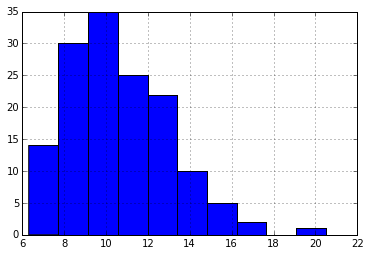

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
catsData.Hwt.hist()

The histogram tells us a few things:

1. The heart weights range from 6 to 20 grams. 
2. 10 grams seems to be the most common heart rate, i.e. the mode of random variable.
3. The average or Expected value of the random variable also seems to be around 10 grams.
4. The histogram leads us to believe that there's a good chance the cat heart rates are normally distributed.

#### The Connections Between Histograms and PDFs

We can generate values (or samples) from the normal distribution with a specific mean and variance using numpy. Here we generate 500 samples from a normal distribution with $\mu=-2$ and $\sigma^2=0.5$. We store these samples as a vector in a variable called `normal_samples`. We then plot a histogram of these samples.

In [34]:
import numpy as np
normal_samples = np.random.normal(loc=-2, scale=0.5, size=500)

(array([   5.,    7.,   26.,   59.,   81.,  118.,  104.,   47.,   39.,   14.]),
 array([-3.48427243, -3.22234754, -2.96042265, -2.69849775, -2.43657286,
        -2.17464797, -1.91272308, -1.65079818, -1.38887329, -1.1269484 ,
        -0.8650235 ]),
 <a list of 10 Patch objects>)

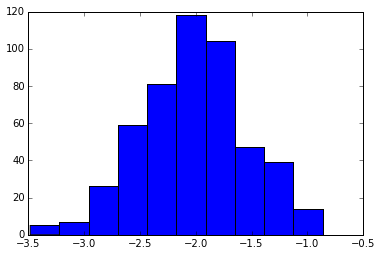

In [35]:
%matplotlib inline
plt.hist(normal_samples)

#### Quantiles

Going back to the cat example, we might be interested in asking questions like how many cat hearts weight more than 10 grams, or how many weight less than 6 grams. A histogram can give you rough answers to these sorts of questions. 

# Estimation